# Linear Regression in keras

## 1.1  Linear Regression with multiple variable (multiple/multivariable linear regression)

<img src="mult_lin_reg_2.PNG">

#### when there are more than one independent variables. It is called a multivariate linear regression

#### problem Statement - To predict the price of a house given there size(in square feet) and number of bedrooms

In [1]:
import os  
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model,Input
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
print ('tensorflow_version: ',tf.__version__)
print ('keras_version: ',keras.__version__)

tensorflow_version:  1.4.0
keras_version:  2.0.4


In [3]:
path = os.getcwd() + '\ex1data2.txt'  
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])  
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


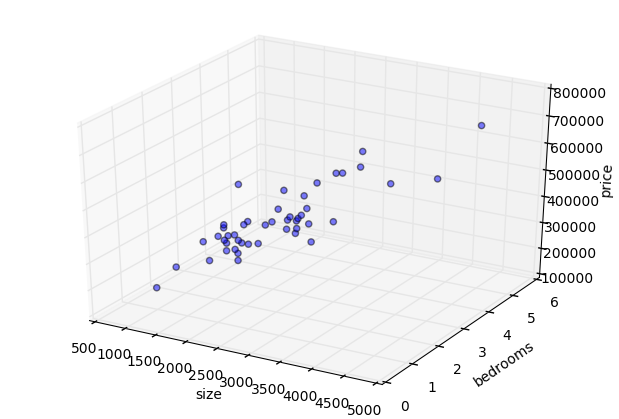

In [5]:
fig = plt.figure()
ax=Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['Size'],data2['Bedrooms'],data2['Price'],c='blue',marker='o',alpha=0.5)
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()

####  feature normalization -  we need to adjust the scale of the features. One way to do this is by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation. Fortunately this is one line of code using pandas.

In [6]:
mean = data2.mean()
std = data2.std()
data_norm = (data2 - mean) / std  
data_norm.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [7]:
data_norm.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,1.889741e-17,2.279500e-16,-8.031401e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


In [8]:
feature_names = ["Size", "Bedrooms"]
#data_x = data2.loc[:,columns]
data_x=data_norm[feature_names]
data_y = data_norm["Price"]
print ('input_shape: ', data_x.shape)
print ('output_shape: ', data_y.shape)
data_x1 = data_norm["Size"]
data_x2 = data_norm["Bedrooms"]
print ('num_samples: ', data_x1.shape)

input_shape:  (47, 2)
output_shape:  (47,)
num_samples:  (47,)


In [9]:
## Reshape data
data_x=np.array(data_x)
data_y=np.array(data_y)
#data_x = np.reshape(data_x,(47,2,1))

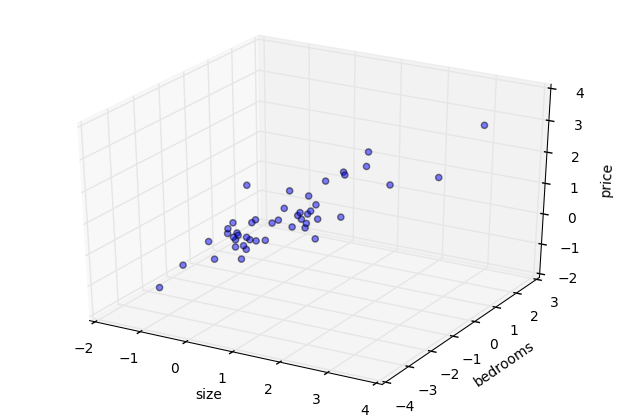

In [10]:
fig = plt.figure()
ax=Axes3D(fig)
#ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_x1,data_x2,data_y,c='blue',marker='o',alpha=0.5)
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()

### For two features

###     linear reg model, a = w1.x1 + w2.x2 + b

#### creating Sequential model in keras

In [11]:
# Define the sequential model
model = Sequential()
model.add(Dense(1, input_dim=2, kernel_initializer='normal', activation='relu'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])



In [16]:
# creating model using Functional API
inputs = Input(shape=(2,))
preds = Dense(1,activation='linear')(inputs)

model_2 = Model(inputs=inputs,outputs=preds)
#sgd=keras.optimizers.SGD()
model_2.compile(optimizer='adam' ,loss='mse',metrics=['mse'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


#### Displaying the model graph

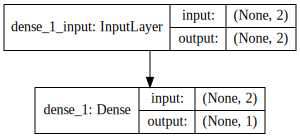

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

#### Train the model

In [17]:
# define a tensorboard callback
tensorboard = TensorBoard(log_dir="./keras_logs_multiple_lin_reg")
# Train the model
hist = model_2.fit(data_x,data_y, batch_size=1, epochs=150, shuffle=False,callbacks=[tensorboard])

Epoch 1/150
47/47 [==============================] - 0s - loss: 0.5230 - mean_squared_error: 0.5230     
Epoch 2/150
47/47 [==============================] - 0s - loss: 0.5038 - mean_squared_error: 0.5038     
Epoch 3/150
47/47 [==============================] - 0s - loss: 0.4878 - mean_squared_error: 0.4878     
Epoch 4/150
47/47 [==============================] - 0s - loss: 0.4732 - mean_squared_error: 0.4732     
Epoch 5/150
47/47 [=========

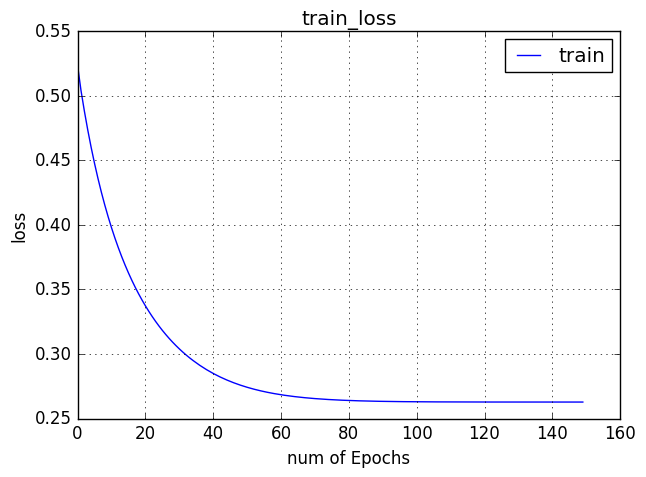

In [18]:
# visualizing losses and accuracy
num_epoch = 150
train_loss=hist.history['loss']
#val_loss=hist.history['val_loss']
#train_acc=hist.history['acc']
#val_acc=hist.history['val_acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

#### Evaluating the model

In [20]:
x_test = np.array(data_x[0:20])
y_test = np.array(data_y[0:20])
score = model_2.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test metrics:', score[1])


20/20 [==============================] - 0s
Test Loss: 0.188148573041
Test metrics: 0.188148573041


#### Predicting the output of test data

In [21]:
#test 
x_test = np.array(data_x[0:5])
y_test = np.array(data_y[0:5])
y_test_predicted=model_2.predict(x_test)
print ('predicted_value: ', y_test_predicted)
print ('true_value: ', y_test)

predicted_value:  [[ 0.12770237]
 [-0.43453795]
 [ 0.45790696]
 [-0.56627089]
 [ 1.0537113 ]]
true_value:  [ 0.47574687 -0.08407444  0.22862575 -0.86702453  1.59538948]


#### to get the actual value of output price since we normalized the input

In [22]:
# getting the actual output
#y_predicted=y_predicted*std + mean

In [23]:
x_test = np.array(data_x)
y_test = np.array(data_y)
y_test_predicted=model_2.predict(x_test)
#y_test_predicted

#### Get the trained parameters

In [25]:
#model.get_weights()
params=model_2.layers[1].get_weights()
params

[array([[ 0.88653511],
        [-0.05595452]], dtype=float32),
 array([ -7.15899369e-05], dtype=float32)]

In [26]:
w = params[0]
b=params[1]

#### Plotting the trained model

(100, 100)


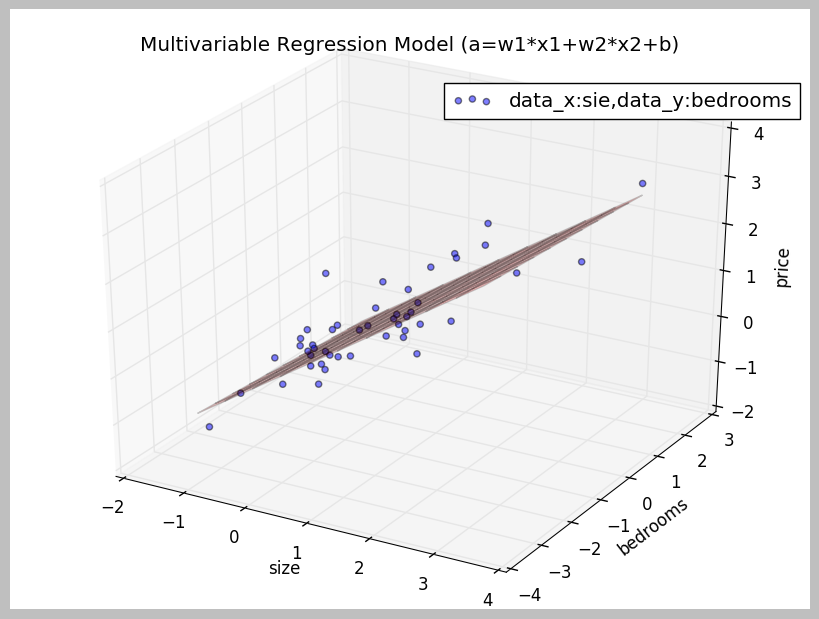

In [27]:

x1_surf,x2_surf= np.meshgrid(np.linspace(data_x1.min(),data_x1.max(),100),np.linspace(data_x2.min(),data_x2.max(),100))
#y_test_predicted_ = np.meshgrid(np.linspace(y_test_predicted.min(),y_test_predicted.max(),100))
Y_predicted_surf = x1_surf*w[0]+x2_surf*w[1]+b
print (Y_predicted_surf.shape)
#fittedY.reshape(x_surf.shape)
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax=Axes3D(fig)
sct = ax.scatter(data_x1,data_x2,data_y,c='blue', marker='o',alpha=0.5)
plt_surf = ax.plot_surface(x1_surf,x2_surf,Y_predicted_surf,color='red',alpha = 0.2)
ax.set_xlabel('size')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.title('Multivariable Regression Model (a=w1*x1+w2*x2+b)')
plt.legend(['data_x:sie,data_y:bedrooms'],bbox_to_anchor=(1, 0.8),loc=4)
plt.show()

#### saving the trained models

In [28]:
model_2.save('multiple_lin_reg_model.h5')


#### Loading the trained model

In [29]:
from keras.models import load_model
loaded_model=load_model('multiple_lin_reg_model.h5')
loaded_model.get_weights()

[array([[ 0.88653511],
        [-0.05595452]], dtype=float32),
 array([ -7.15899369e-05], dtype=float32)]

#### saving the model graph

In [30]:
from keras.utils import plot_model
plot_model(model_2, to_file='multiple_lin_reg_model.png',show_shapes=True)